<h1> Creating a single layer neural network with sigmoid and linear activation functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

<h4> Without activation, ie plain linear/regression model

The purpose of the activation function is to introduce nonlinearity to the model, so it determines how a neuron transforms a weighted input before moving to the next layer. Without this, each layer of the neural network could be merely represented by a linear transformation. 

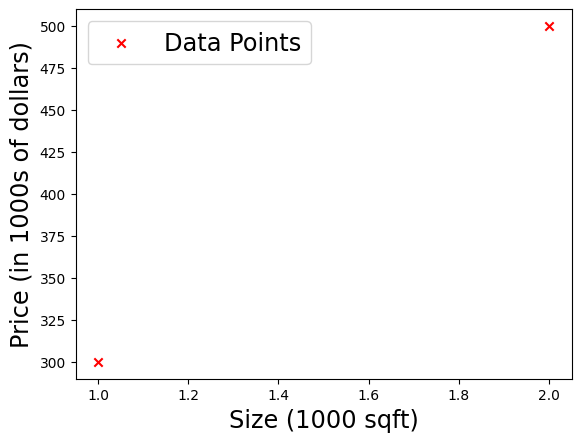

In [2]:
X_train = np.array([[1.0], [2.0]], dtype=np.float32)           #(size in 1000 square feet)
Y_train = np.array([[300.0], [500.0]], dtype=np.float32)       #(price in 1000s of dollars)

fig, ax = plt.subplots(1,1)
ax.scatter(X_train, Y_train, marker='x', c='r', label="Data Points")
ax.legend( fontsize='xx-large')
ax.set_ylabel('Price (in 1000s of dollars)', fontsize='xx-large')
ax.set_xlabel('Size (1000 sqft)', fontsize='xx-large')
plt.show()

In [3]:
linear_layer = tf.keras.layers.Dense(units=1, activation='linear')

In [4]:
# We can view the weights by simply checking the weigths
linear_layer.get_weights()

[]

In [5]:
# We require the inputs to be 2D arrays for the layer to work so we need to reshape our inputs
a1 = linear_layer(X_train[0].reshape(1,1))
print(a1)

tf.Tensor([[0.66567504]], shape=(1, 1), dtype=float32)


In [7]:
print(type(a1))
w, b= linear_layer.get_weights()
print(f"w = {w}, b={b}")

<class 'tensorflow.python.framework.ops.EagerTensor'>
w = [[0.66567504]], b=[0.]


In [8]:
# Suppose we initialize the weights and biases to be random
set_w = np.array([[200]])
set_b = np.array([100])

# set_weights takes a list of numpy arrays
linear_layer.set_weights([set_w, set_b])
print(linear_layer.get_weights())

[array([[200.]], dtype=float32), array([100.], dtype=float32)]


In [9]:
# Comparing the prediction made with the linear method against the neural network layer leads to the same result
prediction_tf = linear_layer(X_train)
prediction_np = np.dot( X_train, set_w) + set_b

In [12]:
prediction_tf, prediction_np

(<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
 array([[300.],
        [500.]], dtype=float32)>,
 array([[300.],
        [500.]]))

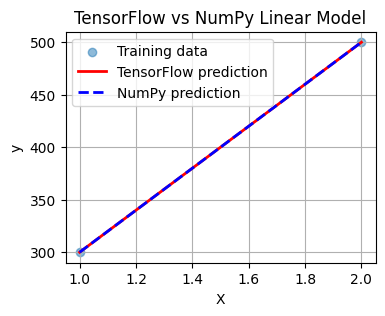

In [16]:
plt.figure(figsize=(4,3))
plt.scatter(X_train, Y_train, label='Training data', alpha=0.5)
plt.plot(X_train, prediction_tf, label='TensorFlow prediction', color='red', linewidth=2)
plt.plot(X_train, prediction_np, '--', label='NumPy prediction', color='blue', linewidth=2)
plt.title("TensorFlow vs NumPy Linear Model")
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

<h4> With activation where we use the sigmoid activation function </h4>

In [18]:
X_train = np.array([0., 1, 2, 3, 4, 5], dtype=np.float32).reshape(-1,1)  # 2-D Matrix
Y_train = np.array([0,  0, 0, 1, 1, 1], dtype=np.float32).reshape(-1,1)  # 2-D Matrix

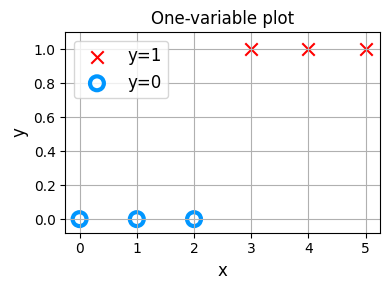

In [21]:
# --- Masks for classes ---
pos = (Y_train == 1)
neg = (Y_train == 0)

# --- Optional color dictionary (like dlc) ---
dlc = {"dlblue": "#0096ff", "dlorange": "#ff9300"}

# --- Plot ---
fig, ax = plt.subplots(1, 1, figsize=(4, 3))
ax.scatter(X_train[pos], Y_train[pos],
           marker='x', s=80, c='red', label="y=1")
ax.scatter(X_train[neg], Y_train[neg],
           marker='o', s=100, facecolors='none',
           edgecolors=dlc["dlblue"], lw=3, label="y=0")

ax.set_ylim(-0.08, 1.1)
ax.set_ylabel('y', fontsize=12)
ax.set_xlabel('x', fontsize=12)
ax.set_title('One-variable plot')
ax.legend(fontsize=12)
ax.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# Implementing a logistic regression model using a single Dense layer with sigmoid activation
model = Sequential(
    [
        tf.keras.layers.Dense(1, input_dim=1,  activation = 'sigmoid', name='L1')
    ]
) # the sequential keyword is to allow for further additions later on

/Users/chamundeshwarivadamalai/Desktop/NeuralNetworks_Basics/venv/lib/python3.13/site-packages/keras/src/layers/core/dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ L1 (Dense)                      │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
logistic_layer = model.get_layer('L1')
w,b = logistic_layer.get_weights()
print(w,b)
print(w.shape,b.shape)

[[-1.6719141]] [0.]
(1, 1) (1,)


In [25]:
# Again seeing what would happen if we change the weights for the logistic regression layer
set_w = np.array([[2]])
set_b = np.array([-4.5])
# set_weights takes a list of numpy arrays
logistic_layer.set_weights([set_w, set_b])
print(logistic_layer.get_weights())

[array([[2.]], dtype=float32), array([-4.5], dtype=float32)]


In [28]:
# Comparing the result with a single 
a1 = model.predict(X_train[0].reshape(1, 1))
print("TensorFlow prediction:", a1)

# Manual logistic (sigmoid) version
z = np.dot(set_w, X_train[0].reshape(1, 1)) + set_b
alog = 1 / (1 + np.exp(-z))  # <-- this is sigmoid
print("NumPy sigmoid output:", alog)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
TensorFlow prediction: [[0.01098694]]
NumPy sigmoid output: [[0.01098694]]


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


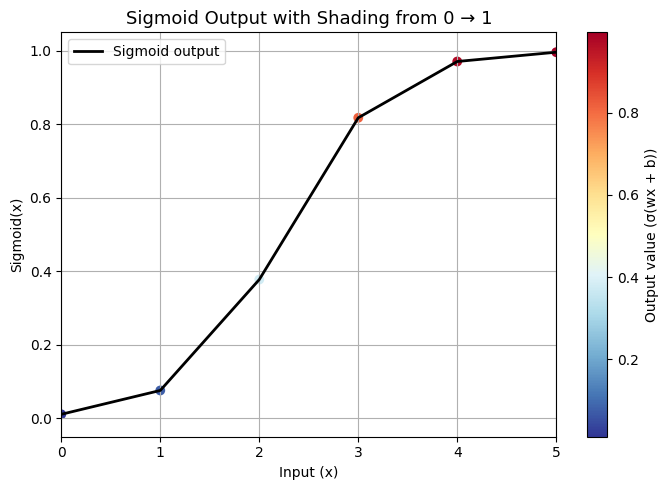

In [32]:
# --- Predictions ---
y_tf = model.predict(X_train)

# --- Plot setup ---
fig, ax = plt.subplots(figsize=(7, 5))

# Background shading: color varies with sigmoid output
ax.scatter(X_train, y_tf, c=y_tf, cmap='RdYlBu_r', s=50, edgecolors='none')

# Sigmoid curve
ax.plot(X_train, y_tf, color='black', linewidth=2, label='Sigmoid output')

# Labels and aesthetics
ax.set_title("Sigmoid Output with Shading from 0 → 1", fontsize=13)
ax.set_xlabel("Input (x)")
ax.set_ylabel("Sigmoid(x)")
ax.set_xlim(X_train.min(), X_train.max())
ax.set_ylim(-0.05, 1.05)
ax.grid(True)
ax.legend()

# Colorbar for shading scale
cbar = plt.colorbar(ax.collections[0], ax=ax)
cbar.set_label('Output value (σ(wx + b))')

plt.tight_layout()
plt.show()